In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

Svaki od studenata označenih sa S1-S9 imaju poddirektorije naznačene sa Final, Midterm1 i Midterm2 koji sadrže .csv fileove sa rezultatima mjerila koja su uzeta sa biomarkera tijekom ispita( Midterm1 = 1. kolovij, Midterm2 = 2. kolokvij, Final = završni ispit )

Počnimo sa prvim studentom i to sa prvog kolokvija pa vidjeti kako za druge studente izgledaju vrijednosti.

In [50]:
#Počinjemo sa 1. direktorijem, da vidimo što možemo izvući
s1_dir = 'Data/S1/Midterm 1/'
os.listdir(s1_dir)

['ACC.csv',
 'BVP.csv',
 'EDA.csv',
 'HR.csv',
 'IBI.csv',
 'info.txt',
 'tags.csv',
 'TEMP.csv']

Ovdje imamo .csv datoeke različitih mjerila i 'info.txt' u kojima piše opis svih tih datoteka.

U INFO.txt piše kako za svaki od datoteka prvi redak iskazuje početak sesije, a drugi red govori o broju puta uzimanja podataka u sekundi.

Napravimo dvije mape koje kao ključeve imaju imena biomarkera,a vrijednosti respektivno, početak sesije za svaki biomarker i frekveniju mjerenja.

In [51]:
session_start_dict = {}
sample_rate_dict = {}

for measure in os.listdir(s1_dir):
    if measure.endswith('.csv'):
        measure_df = pd.read_csv(s1_dir+measure)
        session_start_dict[measure[:-4]] = measure_df.columns[0]#referiramo se na columns jer stupci doslovno imaju naziv UNIX timestampa
        sample_rate_dict[measure[:-4]] = measure_df.iloc[0,0]

In [52]:
#mapa početaka sesije
session_start_dict

{'ACC': '1539435366.000000',
 'BVP': '1539435366.00',
 'EDA': '1539435366.000000',
 'HR': '1539435376.000000',
 'IBI': '1539435366.000000',
 'tags': '1539445997.30',
 'TEMP': '1539435366.000000'}

Izgleda da od svih indikatora, HR počinje 10 sekundi kasnije mjerit heart rate. 
Doduše, dosta se ističe tags koji zapravo ne ističe neka mjerila, nego samo ima neke timestampove vezane za pritisak gumba na uređaju.

In [53]:
#mapa frekvencija mjerenja
sample_rate_dict.pop('tags')
sample_rate_dict

{'ACC': 32.0,
 'BVP': 64.0,
 'EDA': 4.0,
 'HR': 1.0,
 'IBI': 166.788885,
 'TEMP': 4.0}

In [54]:
sample_rate_dict.pop('IBI')

166.788885

Od svih indikatora, IBI nema zaokruženu vrijednost uzorkovanja, što implicira da se radi o nekoj drugoj vrijednosti možda.

INFO.txt: Ukazuje da IBI je zapravo slučajno uzorkovanje vremenskog razmaka između dva otkucaja srca. I vrijednost zapisana je zapravo vrijeme sesije u sekundama kada je prvi razmak zapisan.

Taj prvi interval od 0.39 sekundi je zapisan u 167.sekundi sesije.

Napravimo dataframe za IBI prvog kolokvija studenta 1 i prođimo neke karakteristike

In [55]:
ibi_df = pd.read_csv(s1_dir + 'IBI.csv')
ibi_df

,1539435366.000000,IBI
0,166.788885,0.390643
1,217.697465,0.421894
2,219.775685,0.468771
3,220.181954,0.406269
4,475.599895,0.390643
...,...,...
295,10476.229543,0.562526
296,10561.077177,0.406269
297,10596.078779,0.328140
298,10703.271186,0.375017


In [56]:
ibi_df = ibi_df.rename(columns={'1539435366.000000' : 'heartbeat_stamp', ' IBI' : 'IBI'})
ibi_df

,heartbeat_stamp,IBI
0,166.788885,0.390643
1,217.697465,0.421894
2,219.775685,0.468771
3,220.181954,0.406269
4,475.599895,0.390643
...,...,...
295,10476.229543,0.562526
296,10561.077177,0.406269
297,10596.078779,0.328140
298,10703.271186,0.375017


In [57]:
#Provjerimo tipove podataka
ibi_df.dtypes

heartbeat_stamp    float64
IBI                float64
dtype: object

array([[<AxesSubplot: title={'center': 'heartbeat_stamp'}>,
        <AxesSubplot: title={'center': 'IBI'}>]], dtype=object)

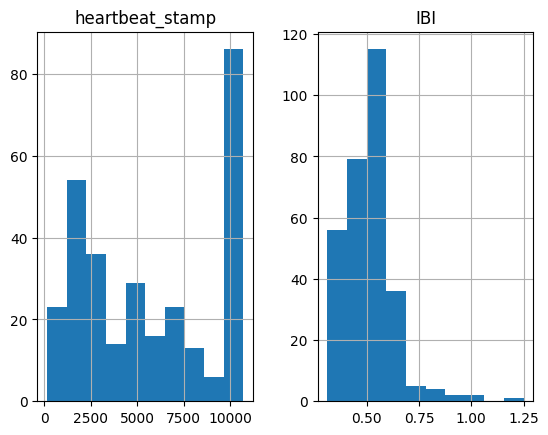

In [58]:
#Pogledajmo distribucije
ibi_df.hist()

Izgleda da nam distribucije nisu nešto predivne

Kao što vidimo imamo jako puno valuesa u session_timeu u kojem >10000 sekundi je puno otkucaja srca.

In [59]:
ibi_df['heartbeat_stamp'].describe()

count      300.000000
mean      5687.235746
std       3602.396165
min        166.788885
25%       2214.366986
50%       5164.650471
75%      10088.270378
max      10703.708706
Name: heartbeat_stamp, dtype: float64

<AxesSubplot: >

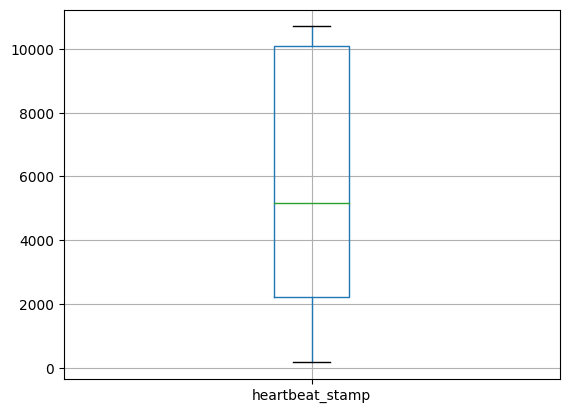

In [60]:
ibi_df.boxplot(column=['heartbeat_stamp'])

Nema nikakvih stršećih vrijednosti za session_time, ali zato možda IBI je drugačiji

<AxesSubplot: >

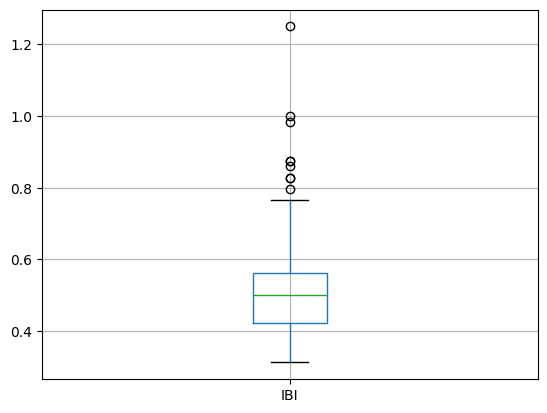

In [61]:
ibi_df.boxplot(column=['IBI'])

Kako vidimo, ima dobar broj stršećih vrijednosti vezano za razmak između otkucaja

In [62]:
ibi_stats = ibi_df.describe()
ibi_stats

,heartbeat_stamp,IBI
count,300.000000,300.000000
mean,5687.235746,0.507315
std,3602.396165,0.120910
min,166.788885,0.312514
25%,2214.366986,0.421894
50%,5164.650471,0.500023
75%,10088.270378,0.562526
max,10703.708706,1.250057


In [63]:
ibi_outliers = ibi_df[ibi_df['IBI'] > (ibi_stats.loc['75%', 'IBI'] + 1.5*(ibi_stats.loc['75%', 'IBI'] - ibi_stats.loc['25%', 'IBI']))]

In [64]:
len(ibi_outliers)/len(ibi_df)

0.03

Kao što vidimo, istaklo se 3% vrijednosti koji su outlieri s obzirom na predstavljeni boxplot.

Ovo ćemo automatski uradit za svaki measure

In [89]:
measures_list = {}#lista dataframea za svako mjerilo

for measure in os.listdir(s1_dir):
    if measure.endswith('.csv') and measure!='tags.csv':
        measure_df = pd.read_csv(s1_dir+measure)
        measure_df = measure_df.tail(measure_df.shape[0] - 1)
        measures_list[measure[:-4]] = measure_df
measures_list      

{'ACC':         1539435366.000000   1539435366.000000   1539435366.000000.1
 1                    -3.0               -62.0                  12.0
 2                    -3.0               -62.0                  12.0
 3                    -3.0               -62.0                  12.0
 4                    -3.0               -62.0                  12.0
 5                    -3.0               -62.0                  12.0
 ...                   ...                 ...                   ...
 357698               55.0               -19.0                  18.0
 357699               56.0               -19.0                  18.0
 357700               55.0               -19.0                  18.0
 357701               56.0               -20.0                  18.0
 357702               56.0               -19.0                  18.0
 
 [357702 rows x 3 columns],
 'BVP':         1539435366.00
 1               -0.00
 2               -0.00
 3               -0.00
 4               -0.00
 5           

Izgleda da ima puno razmaka koji su veći nego obično

Vratimo se na UNIX timestampove vezane za početak sesije. Trebamo razumjeti što za što znače timestampovi zapisani u tags.csv i zašto su toliko različiti od ostalih.

Prvo ćemo uzeti duljinu stupca dataframea jedinog indikatora koji je uzorkovan samo jednom po sekundi, a to je HR.

In [90]:
hr_df = measures_list['HR']
len(hr_df)

11169

In [91]:
tags_df = pd.read_csv(s1_dir+'tags.csv')
tags_df.iloc[0,0]

1539446543.85

In [92]:
1539446543.85 - 1539435376

11167.849999904633

Kako je 1539446543.85 - 1539435376 = 11167.85 što je blizu 11169, možemo pretpostaviti da drugi redak u tags.csv označava sami kraj sesije, i kraj ispita

<h1>Idemo pogledati karakteristike svih ostalih indikatora</h1>

In [93]:
acc_df = measures_list['ACC']
acc_df

,1539435366.000000,1539435366.000000,1539435366.000000.1
1,-3.0,-62.0,12.0
2,-3.0,-62.0,12.0
3,-3.0,-62.0,12.0
4,-3.0,-62.0,12.0
5,-3.0,-62.0,12.0
...,...,...,...
357698,55.0,-19.0,18.0
357699,56.0,-19.0,18.0
357700,55.0,-19.0,18.0
357701,56.0,-20.0,18.0


In [94]:
#Izbacimo prvi redak koji je samo sample rate
acc_df.columns = ['x', 'y', 'z']

In [95]:
acc_df

,x,y,z
1,-3.0,-62.0,12.0
2,-3.0,-62.0,12.0
3,-3.0,-62.0,12.0
4,-3.0,-62.0,12.0
5,-3.0,-62.0,12.0
...,...,...,...
357698,55.0,-19.0,18.0
357699,56.0,-19.0,18.0
357700,55.0,-19.0,18.0
357701,56.0,-20.0,18.0


In [96]:
acc_df.dtypes

x    float64
y    float64
z    float64
dtype: object

<AxesSubplot: >

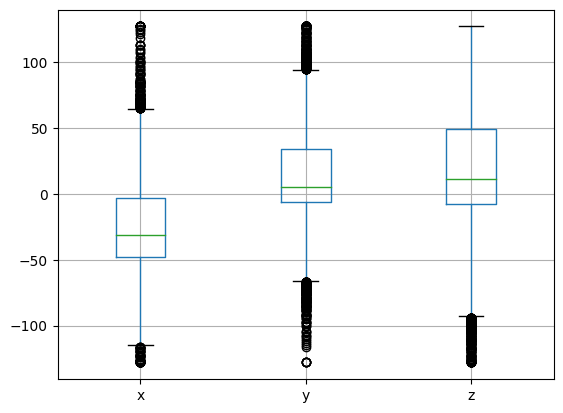

In [121]:
acc_df.boxplot()

In [122]:
acc_stats = acc_df.describe()
acc_stats

,x,y,z
count,357702.000000,357702.000000,357702.000000
mean,-26.481949,10.666591,13.242772
std,26.971639,36.100694,34.868002
min,-128.000000,-128.000000,-128.000000
25%,-48.000000,-6.000000,-8.000000
50%,-31.000000,5.000000,11.000000
75%,-3.000000,34.000000,49.000000
max,127.000000,127.000000,127.000000


In [132]:
acc_x_outliers = acc_df[(acc_df['x'] > (acc_stats.loc['75%', 'x'] + 1.5*(acc_stats.loc['75%', 'x'] - acc_stats.loc['25%', 'x']))) | 
                        (acc_df['x'] < (acc_stats.loc['25%', 'x'] - 1.5*(acc_stats.loc['75%', 'x'] - acc_stats.loc['25%', 'x'])))]
acc_x_outliers

,x,y,z
56587,101.0,-24.0,-109.0
101367,127.0,-115.0,-128.0
101369,75.0,-21.0,-30.0
102009,-124.0,-20.0,-128.0
102072,-128.0,49.0,-128.0
...,...,...,...
322960,65.0,34.0,-37.0
322961,69.0,34.0,-37.0
324248,69.0,27.0,-36.0
324249,91.0,46.0,-32.0


In [133]:
acc_y_outliers = acc_df[(acc_df['y'] > (acc_stats.loc['75%', 'y'] + 1.5*(acc_stats.loc['75%', 'y'] - acc_stats.loc['25%', 'y']))) |
                        (acc_df['y'] < (acc_stats.loc['25%', 'y'] - 1.5*(acc_stats.loc['75%', 'y'] - acc_stats.loc['25%', 'y'])))]
acc_y_outliers

,x,y,z
10418,-1.0,-81.0,-2.0
10419,-5.0,-69.0,3.0
10428,-2.0,-68.0,11.0
10429,-6.0,-70.0,8.0
10430,-7.0,-74.0,2.0
...,...,...,...
357586,-5.0,-95.0,24.0
357587,-2.0,-91.0,27.0
357588,-10.0,-77.0,34.0
357589,-14.0,-71.0,38.0


In [134]:
acc_z_outliers = acc_df[(acc_df['z'] > (acc_stats.loc['75%', 'z'] + 1.5*(acc_stats.loc['75%', 'z'] - acc_stats.loc['25%', 'z']))) |
                        (acc_df['z'] < (acc_stats.loc['25%', 'z'] - 1.5*(acc_stats.loc['75%', 'z'] - acc_stats.loc['25%', 'z'])))]
acc_z_outliers

,x,y,z
47270,7.0,26.0,-98.0
47381,7.0,29.0,-115.0
47382,9.0,35.0,-128.0
47383,10.0,26.0,-115.0
47396,6.0,24.0,-95.0
...,...,...,...
334021,35.0,-3.0,-94.0
334022,31.0,-1.0,-95.0
334044,35.0,3.0,-95.0
335432,30.0,0.0,-96.0


In [135]:
(len(acc_x_outliers) + len(acc_y_outliers) + len(acc_z_outliers))/len(acc_df)#samo 0.3 posto, dakle to ne utječe puno na distribuciju podataka

0.002843148766291494

Za ACC prvog studenta ističe se samo 0.2 posto stršećih vrijednosti što neće utjecati puno na naš dataset

<h2>BVP</h2>

In [260]:
bvp_df = measures_list['BVP']
bvp_df

,BVP_value
1,-0.00
2,-0.00
3,-0.00
4,-0.00
5,-0.00
...,...
715403,-21.56
715404,-21.85
715405,-20.92
715406,-18.70


In [261]:
bvp_df.columns = ['BVP_value']
bvp_df.dtypes

BVP_value    float64
dtype: object

Ima isključivo float vrijednosti i jako velike je veličine, ali to je zbog svog sampleanja od 64 puta u sekundi


In [262]:
sample_rate_dict['BVP']

64.0

In [263]:
bvp_stats = bvp_df.describe()
bvp_stats

,BVP_value
count,715407.000000
mean,-0.000863
std,5.831480
min,-394.110000
25%,-0.560000
50%,-0.030000
75%,0.490000
max,283.960000


<AxesSubplot: >

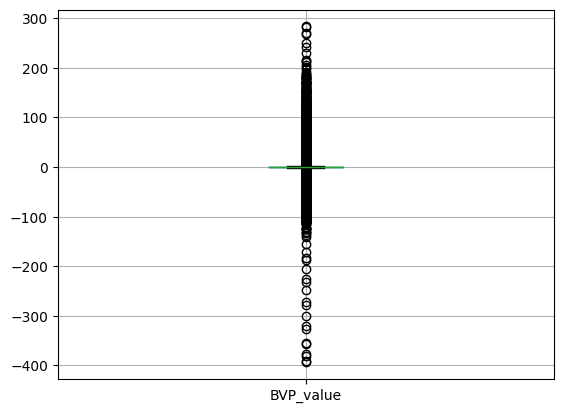

In [264]:
bvp_df.boxplot()

Ovdje se može ukazati na veoma puno outliera

In [137]:
bvp_df_outliers = bvp_df[(bvp_df['BVP_value'] > (bvp_stats.loc['75%', 'BVP_value'] + 1.5*(bvp_stats.loc['75%', 'BVP_value'] - bvp_stats.loc['25%', 'BVP_value']))) |
                         (bvp_df['BVP_value'] < (bvp_stats.loc['25%', 'BVP_value'] - 1.5*(bvp_stats.loc['75%', 'BVP_value'] - bvp_stats.loc['25%', 'BVP_value'])))]
bvp_df_outliers

,BVP_value
26,2.40
27,2.78
28,3.23
29,3.79
30,4.44
...,...
715403,-21.56
715404,-21.85
715405,-20.92
715406,-18.70


In [138]:
len(bvp_df_outliers)/len(bvp_df)#čak 11.14 posto

0.11139533160844108

Izgleda da bez obzira na veliko prikazanje stršećih vrijednosti i spljoštenosti boxplota, ipak ima samo 11 posto outliera u BVP podatcima. Iako ni to nije malo, opet je manje nego očekivano

<h2>EDA</h2>

In [265]:
eda_df = measures_list['EDA']
eda_df

,EDA_value
1,0.000000
2,0.002563
3,0.019221
4,0.021784
5,0.023065
...,...
44708,0.025628
44709,0.024347
44710,0.024347
44711,0.025628


In [140]:
eda_df.columns = ['EDA_value']
eda_stats = eda_df.describe()
eda_stats

,EDA_value
count,44712.000000
mean,0.325909
std,0.520105
min,0.000000
25%,0.024347
50%,0.161724
75%,0.215277
max,2.863800


<AxesSubplot: >

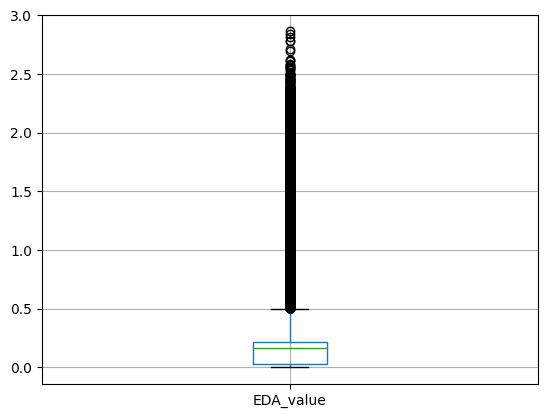

In [141]:
eda_df.boxplot()

In [143]:
eda_df_outliers = eda_df[(eda_df['EDA_value'] > (eda_stats.loc['75%', 'EDA_value'] + 1.5*(eda_stats.loc['75%', 'EDA_value'] - eda_stats.loc['25%', 'EDA_value']))) |
                         (eda_df['EDA_value'] < (eda_stats.loc['25%', 'EDA_value'] - 1.5*(eda_stats.loc['75%', 'EDA_value'] - eda_stats.loc['25%', 'EDA_value'])))]
eda_df_outliers

,EDA_value
13064,0.640704
13065,0.548443
13066,0.512563
13068,0.520252
13069,0.522815
...,...
22621,0.503860
22623,0.503860
22625,0.502579
22627,0.502579


In [144]:
len(eda_df_outliers) / len(eda_df) #18.78 posto

0.187846663088209

EDA podatci sadrže daleko najveći postotak outliera od svih biomarkeraskoro 20 posto. Ovo bi već moglo predstaviti problem za daljnji inženjering podataka

<h2>HR</h2>

In [146]:
hr_df.columns = ['HR_value']
hr_df.dtypes

HR_value    float64
dtype: object

In [148]:
hr_stats = hr_df.describe()
hr_stats

,HR_value
count,11169.000000
mean,103.113747
std,26.304771
min,57.000000
25%,83.480000
50%,97.570000
75%,115.920000
max,194.470000


<AxesSubplot: >

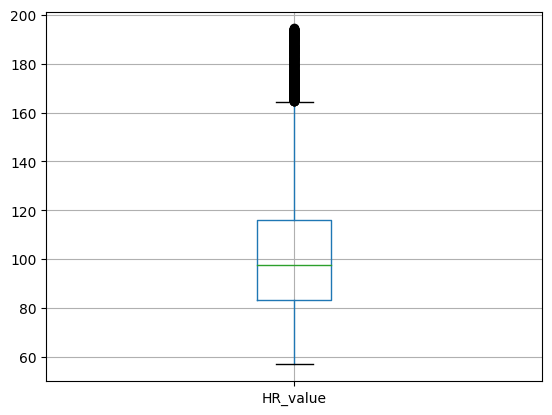

In [149]:
hr_df.boxplot()

In [154]:
hr_outliers = hr_df[(hr_df['HR_value'] > (hr_stats.loc['75%','HR_value'] + 1.5*(hr_stats.loc['75%','HR_value'] - hr_stats.loc['25%','HR_value']))) |
                    (hr_df['HR_value'] < (hr_stats.loc['25%','HR_value'] - 1.5*(hr_stats.loc['75%','HR_value'] - hr_stats.loc['25%','HR_value'])))]
hr_outliers

,HR_value
156,165.40
157,166.48
158,167.53
159,168.67
160,169.85
...,...
3112,167.97
3113,167.28
3114,166.43
3115,165.70


In [155]:
len(hr_outliers)/len(hr_df)#3.64 posto

0.0364401468349897

<h2>TEMP</h2>

In [156]:
temp_df = measures_list['TEMP']
temp_df

,1539435366.000000
1,22.51
2,22.51
3,22.51
4,22.51
5,22.51
...,...
44708,25.57
44709,25.55
44710,25.55
44711,25.55


In [157]:
temp_df.columns = ['TEMP_value']
temp_df.dtypes

TEMP_value    float64
dtype: object

In [158]:
temp_stats = temp_df.describe()
temp_stats

,TEMP_value
count,44712.000000
mean,26.418379
std,2.214751
min,22.490000
25%,23.590000
50%,27.590000
75%,28.130000
max,28.730000


<AxesSubplot: >

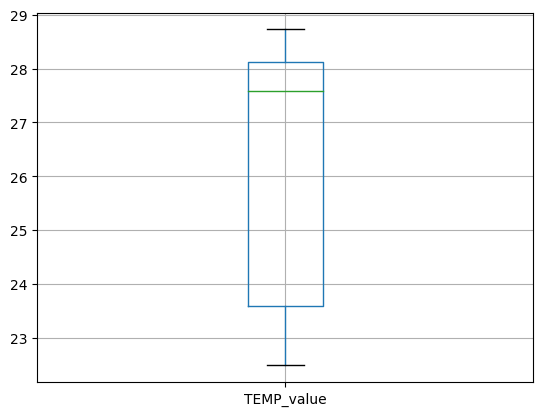

In [160]:
temp_df.boxplot()

U boxplotu se pokazuje da čak uopće nema outliera za TEMP

<h1>USPOREĐIVANJE S INDIKATORIMA OD SVIH OSTALIH STUDENATA</h1>

<h4>Sada bi bilo dobro vizualno predstaviti boxplot ili distribucije različitih indikatora svih ostalih studenata u obliku 3*3 subplota. 
I to iz svakog ispita.</h4>

In [225]:
data_stream = 'Data'

tests = {'Midterm 1': {}, 'Midterm 2': {}, 'Final': {}}

acc_lists=[]
bvp_lists=[]
eda_lists=[]
hr_lists=[]
ibi_lists=[]
temp_lists=[]

for test in ['Midterm 1/', 'Midterm 2/', 'Final/']:
    
    acc_lists=[]
    bvp_lists=[]
    eda_lists=[]
    hr_lists=[]
    ibi_lists=[]
    temp_lists=[]
    
    for student_dir in os.listdir(data_stream):      #print(data_stream +  '/' + student_dir + '/' + test)            
        for indicator in os.listdir(data_stream +  '/' + student_dir + '/' + test):
            if indicator.endswith('.csv') and indicator not in ('info.txt', 'tags.csv'):      
                dataframe = pd.read_csv(data_stream +  '/' + student_dir + '/' + test + indicator)
                
                
                if indicator[:-4] == 'ACC':
                    dataframe = dataframe.tail(dataframe.shape[0] - 1)
                    dataframe.columns = ['x','y','z']
                    acc_lists.append(dataframe)
                    if student_dir=='S9':
                        tests[test[:-1]][indicator[:-4].lower()] = acc_lists
                        
                elif indicator[:-4] == 'BVP':
                    dataframe.columns = ['BVP_value'] 
                    bvp_lists.append(dataframe)
                    if student_dir=='S9':
                        tests[test[:-1]][indicator[:-4].lower()] = bvp_lists
                        
                elif indicator[:-4] == 'TEMP':
                    dataframe.columns = ['TEMP_value'] 
                    dataframe = dataframe.tail(dataframe.shape[0] - 1)
                    temp_lists.append(dataframe)
                    if student_dir=='S9':
                        tests[test[:-1]][indicator[:-4].lower()] = temp_lists 
                        
                elif indicator[:-4] == 'EDA':
                    dataframe.columns = ['EDA_value'] 
                    dataframe = dataframe.tail(dataframe.shape[0] - 1)
                    eda_lists.append(dataframe)
                    if student_dir=='S9':
                        tests[test[:-1]][indicator[:-4].lower()] = eda_lists
                        
                elif indicator[:-4] == 'HR':
                    dataframe.columns = ['HR_value'] 
                    dataframe = dataframe.tail(dataframe.shape[0] - 1)
                    hr_lists.append(dataframe)
                    if student_dir=='S9':
                        tests[test[:-1]][indicator[:-4].lower()] = hr_lists
                        
                else:
                    dataframe.columns = ['heartbeat_stamp', 'IBI'] 
                    dataframe = dataframe.tail(dataframe.shape[0] - 1)
                    ibi_lists.append(dataframe)
                    if student_dir=='S9':
                        tests[test[:-1]][indicator[:-4].lower()] = ibi_lists

In [226]:
tests

{'Midterm 1': {'acc': [           x     y     z
   1       -3.0 -62.0  12.0
   2       -3.0 -62.0  12.0
   3       -3.0 -62.0  12.0
   4       -3.0 -62.0  12.0
   5       -3.0 -62.0  12.0
   ...      ...   ...   ...
   357698  55.0 -19.0  18.0
   357699  56.0 -19.0  18.0
   357700  55.0 -19.0  18.0
   357701  56.0 -20.0  18.0
   357702  56.0 -19.0  18.0
   
   [357702 rows x 3 columns],
              x     y     z
   1        0.0 -61.0  12.0
   2        0.0 -63.0  12.0
   3        0.0 -63.0  12.0
   4        0.0 -63.0  12.0
   5        0.0 -64.0  12.0
   ...      ...   ...   ...
   373982  58.0  19.0  12.0
   373983  58.0  22.0  14.0
   373984  55.0  25.0  11.0
   373985  60.0  27.0  14.0
   373986  65.0  -1.0  16.0
   
   [373986 rows x 3 columns],
              x     y     z
   1        0.0 -62.0  10.0
   2        0.0 -62.0  10.0
   3        0.0 -62.0  10.0
   4        0.0 -62.0  11.0
   5        0.0 -62.0  10.0
   ...      ...   ...   ...
   383492  39.0   2.0  48.0
   383493  39.0 

Znam da je dosta komplicirana 'tests' struktura, kao mapa čiji su ključevi tipovi testovi i vrijednosti mape čije si su ključevi indikatori, te vrijednosti su liste dataframeova od indikatora svakog studenta

Međutim, ova struktura ima svrhu, a to je da se definira funkcija boxplot_and_stats(student_index, test, indicator) koja će za bilokojeg studenta na bilo kojem testu i za bilo koje mjerilo vratiti neki boxplot i sažete podatke.

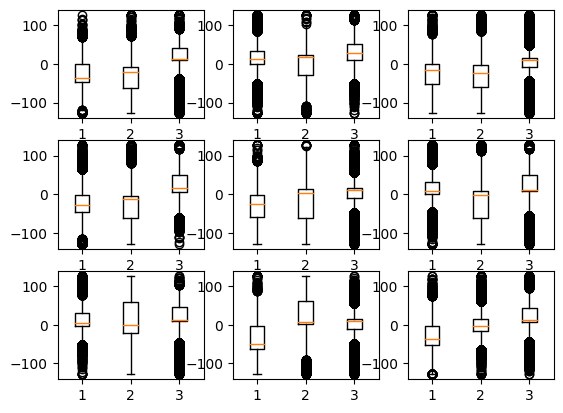

<Figure size 10000x5000 with 0 Axes>

In [201]:
acc_lists = tests['Midterm 1']['acc']

fig, a = plt.subplots(3,3)
plt.figure(figsize=(100,50))

for i in range(3):
    for j in range(3):
        a[i,j].boxplot(acc_lists[i*3 + j]) 

In [259]:
def boxplot_and_stats(student_index, test, indicator, ibi_1=False, ibi_2=False, 
                      acc_x=False, acc_y=False, acc_z=False):    
    list = tests[test][indicator]
    
    if student_index==1:
        student_index=0
    if student_index==10:
        student_index=1
    df = list[student_index]    
    
    if indicator =='ibi':
        if (ibi_1==False and ibi_2==False) or (ibi_1==True and ibi_2==True):
            ibi_1=True
            ibi_1_plot = df.boxplot(column=['heartbeat_stamp'])
            ibi_1_plot.plot()
            print(df.describe()['heartbeat_stamp'])
            
        if ibi_2 and not ibi_1:            
            ibi_2_plot = df.boxplot(column=['IBI'])
            ibi_2_plot.plot()
            print(df.describe()['IBI'])   
            
    elif indicator=='acc' and sum([acc_x, acc_y, acc_z])==1:
        if acc_x==True:
            acc_plot = df.boxplot(column=['x']) 
            acc_plot.plot()
            print(df.describe()['x']) 
        elif acc_y==True:
            acc_plot = df.boxplot(column=['y']) 
            acc_plot.plot()
            print(df.describe()['y']) 
        else:
            acc_plot = df.boxplot(column=['z']) 
            acc_plot.plot()
            print(df.describe()['z']) 
    else:
            indicator_plot = df.boxplot()
            indicator_plot.plot()
            print(df.describe())  
        
    

           BVP_value
count  831491.000000
mean        0.001716
std        64.358381
min     -1188.560000
25%        -8.500000
50%         0.430000
75%         9.470000
max      1499.570000


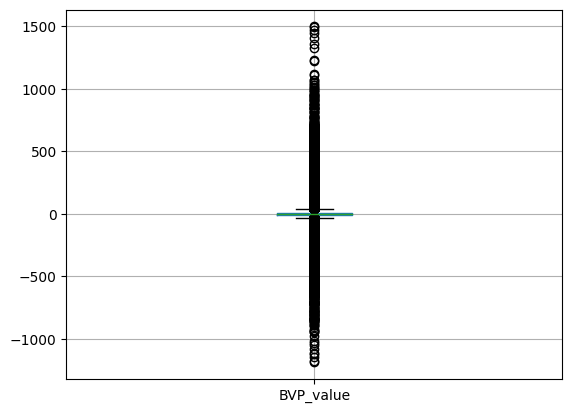

In [256]:
boxplot_and_stats(10, 'Midterm 2', 'bvp', ibi_2=True, ibi_1=True)

          EDA_value
count  78594.000000
mean       0.212143
std        0.343604
min        0.000000
25%        0.000000
50%        0.023056
75%        0.382980
max        1.706552


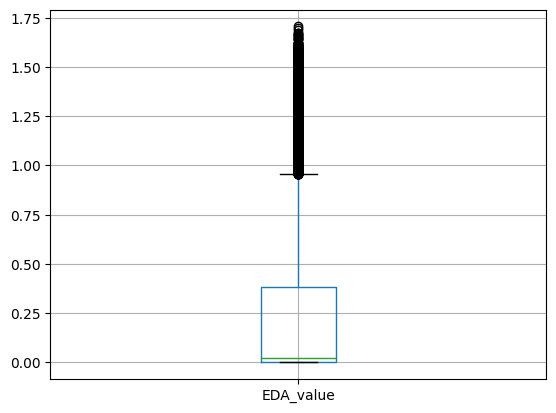

In [257]:
boxplot_and_stats(7,'Final', 'eda')

                   x              y              z
count  357702.000000  357702.000000  357702.000000
mean      -26.481949      10.666591      13.242772
std        26.971639      36.100694      34.868002
min      -128.000000    -128.000000    -128.000000
25%       -48.000000      -6.000000      -8.000000
50%       -31.000000       5.000000      11.000000
75%        -3.000000      34.000000      49.000000
max       127.000000     127.000000     127.000000


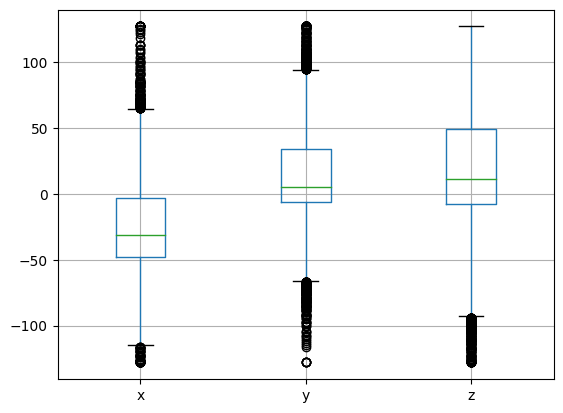

In [258]:
boxplot_and_stats(1, 'Midterm 1', 'acc', acc_x=True, acc_y=True)

Prošli put za prvog studenta koji je pisao međuispit, nismo imali nikakve oscilacije u temperaturi. Ajmo provjerit za neke druge situacije.

         TEMP_value
count  60968.000000
mean      30.185718
std        4.906106
min       17.070000
25%       28.310000
50%       33.050000
75%       33.330000
max       34.000000


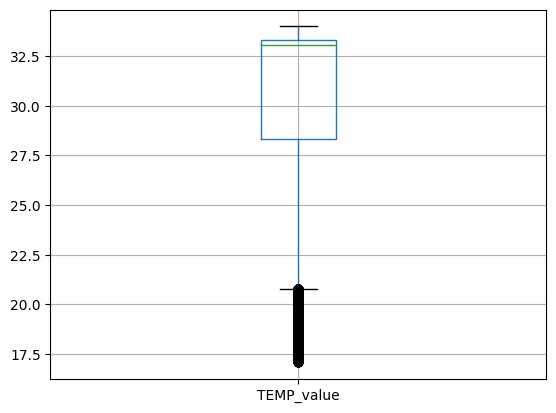

In [266]:
boxplot_and_stats(5, 'Final', 'temp')